<a href="https://colab.research.google.com/github/ngotancuong/mse.dip/blob/main/L8_7Object_Counting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of objects: 3
Number of objects: 20


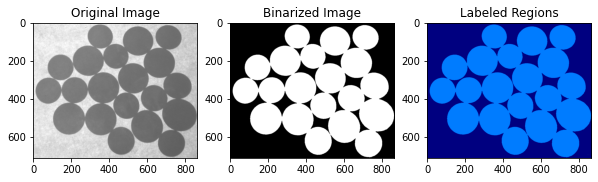

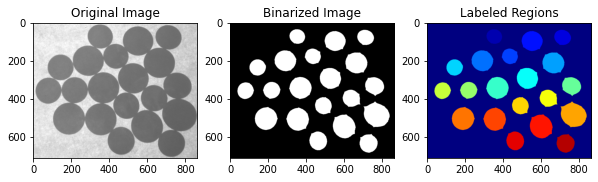

In [3]:
import cv2
import numpy as np
import urllib.request
from matplotlib import pyplot as plt

# Load image from URL
url = 'https://raw.githubusercontent.com/ngotancuong/mse.dip/main/images/coins%20(1).png'
req = urllib.request.urlopen(url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1)

# Counting on original image
fig, axs = plt.subplots(1, 3, figsize=(10, 10))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')

# Binarize the original image
level, bwImg1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
axs[1].imshow(bwImg1, cmap='gray')
axs[1].set_title('Binarized Image')

# Region labeling
num_labels, labels = cv2.connectedComponents(bwImg1)
rgbLabel1 = cv2.applyColorMap(np.uint8(255 * labels / num_labels), cv2.COLORMAP_JET)
axs[2].imshow(cv2.cvtColor(rgbLabel1, cv2.COLOR_BGR2RGB))
axs[2].set_title('Labeled Regions')
print('Number of objects:', num_labels - 1)

# Counting on processed (dilation) image
se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (50, 50))
dilatedImg = cv2.dilate(img, se)

fig, axs = plt.subplots(1, 3, figsize=(10, 10))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')

# Binarize the processed image
level, bwImg2 = cv2.threshold(dilatedImg, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
axs[1].imshow(bwImg2, cmap='gray')
axs[1].set_title('Binarized Image')

# Region labeling
num_labels, labels = cv2.connectedComponents(bwImg2)
rgbLabel2 = cv2.applyColorMap(np.uint8(255 * labels / num_labels), cv2.COLORMAP_JET)
axs[2].imshow(cv2.cvtColor(rgbLabel2, cv2.COLOR_BGR2RGB))
axs[2].set_title('Labeled Regions')
print('Number of objects:', num_labels - 1)

plt.show()
